In [19]:
import numpy as np 
import pandas as pd
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('Trainn_cnn.csv')
test = pd.read_csv('Testt_cnn.csv')
print(train)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [3]:
print(test)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [4]:
y = train['label']
print(y)
train = train.drop('label',  axis =1)
#print(train)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [5]:
train=train/225.0#pixels normalizing 
#print(type(train))#df
test = test/225.0
train = np.array(train)
print(train.size)#array
test = np.array(test)
print(test.size)
train = train.reshape(train.shape[0], 28, 28,1)#reshaping 
test = test.reshape(test.shape[0], 28, 28,1)

32928000
21952000


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train, y, test_size=0.2)


In [7]:
#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = tf.keras.utils.to_categorical(Y_val, num_classes=10)
print(Y_train[1:10])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [8]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [10]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# from IPython.display import Image
# Image("model.png")

In [12]:
#Compiling the model OPTIMIZER IS SGD 
model1.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  

In [14]:
history1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_val, Y_val),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15


C:\Users\madhu\Anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 55s 105ms/step - loss: 0.5820 - accuracy: 0.8093 - val_loss: 0.0948 - val_accuracy: 0.9743
Epoch 2/15
525/525 [==============================] - 69s 132ms/step - loss: 0.1893 - accuracy: 0.9413 - val_loss: 0.1132 - val_accuracy: 0.9690
Epoch 3/15
525/525 [==============================] - 63s 119ms/step - loss: 0.1420 - accuracy: 0.9548 - val_loss: 0.0622 - val_accuracy: 0.9840
Epoch 4/15
525/525 [==============================] - 64s 122ms/step - loss: 0.1157 - accuracy: 0.9632 - val_loss: 0.0628 - val_accuracy: 0.9830
Epoch 5/15
525/525 [==============================] - 61s 116ms/step - loss: 0.1044 - accuracy: 0.9680 - val_loss: 0.0624 - val_accuracy: 0.9845
Epoch 6/15
525/525 [==============================] - 63s 121ms/step - loss: 0.1002 - accuracy: 0.9695 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 7/15
525/525 [==============================] - 61s 116ms/step - loss: 0.0898 - accuracy: 0.9715 - val_loss: 0.0655 - val_accuracy: 0.9

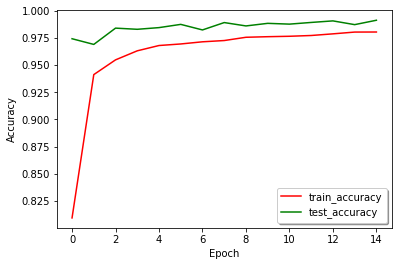

In [21]:
#Comparing training and testing accuraries for the model in which number of nuerons increases from  (64,128) 
# plt.plot(history1.history['loss'], color='r')
# plt.plot(history1.history['val_loss'], color='g')
# plt.legend(('loss', 'val_loss'), loc='upper right', shadow=True)
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.show()
plt.plot(history1.history['accuracy'], color='r')
plt.plot(history1.history['val_accuracy'], color='g')
#Plt.title('Accuracy vs Epochs for Optimizer:SGD, number of nuerons:(64,128)')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [22]:
#Plotting Confusion Matrix
y_pred1 = model1.predict(X_val)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_val, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred1)
print(cm)

C:\Users\madhu\Anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[806   0   0   0   1   0   2   0   1   0]
 [  0 923   0   0   1   0   0   6   0   0]
 [  0   0 885   0   0   0   0   2   0   0]
 [  0   0   1 859   0   2   0   0   2   0]
 [  0   0   0   0 789   0   1   3   0   1]
 [  0   0   0   1   0 739   2   0   2   0]
 [  0   0   0   1   2   2 811   0   2   0]
 [  0   1   3   0   2   0   0 847   0   0]
 [  0   1   0   0   1   1   1   2 827   1]
 [  1   1   0   0   7   7   0   6   3 841]]


(128,256)

In [33]:
#Preparing a CNN model architecture
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 128)       3328      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         819456    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [34]:
#Compiling the model OPTIMIZER IS SGD 
model2.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  

In [40]:
history2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_val, Y_val),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
525/525 [==============================] - 137s 262ms/step - loss: 0.6558 - accuracy: 0.7910 - val_loss: 0.1235 - val_accuracy: 0.9664
Epoch 2/15
525/525 [==============================] - 147s 281ms/step - loss: 0.1832 - accuracy: 0.9429 - val_loss: 0.0857 - val_accuracy: 0.9779
Epoch 3/15
525/525 [==============================] - 145s 276ms/step - loss: 0.1331 - accuracy: 0.9579 - val_loss: 0.0420 - val_accuracy: 0.9877
Epoch 4/15
525/525 [==============================] - 146s 279ms/step - loss: 0.1111 - accuracy: 0.9655 - val_loss: 0.0504 - val_accuracy: 0.9864
Epoch 5/15
525/525 [==============================] - 146s 279ms/step - loss: 0.0979 - accuracy: 0.9696 - val_loss: 0.0635 - val_accuracy: 0.9824
Epoch 6/15
525/525 [==============================] - 146s 278ms/step - loss: 0.0902 - accuracy: 0.9725 - val_loss: 0.0744 - val_accuracy: 0.9806
Epoch 7/15
525/525 [==============================] - 145s 277ms/step - loss: 0.0820 - accuracy: 0.9747 - val_loss: 0.0585 -

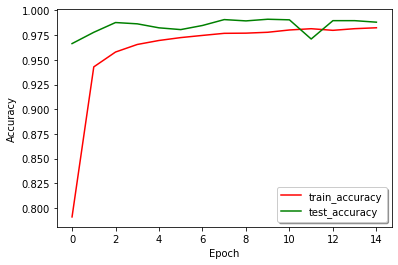

In [41]:
#Comparing training and testing accuraries for the model in which number of nuerons increases from  (64,128) 
# plt.plot(history1.history['loss'], color='r')
# plt.plot(history1.history['val_loss'], color='g')
# plt.legend(('loss', 'val_loss'), loc='upper right', shadow=True)
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.show()
plt.plot(history2.history['accuracy'], color='r')
plt.plot(history2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
#Plt.title('Accuracy vs Epochs for Optimizer:SGD, number of nuerons:(128,256)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [42]:
#Plotting Confusion Matrix
y_pred2 = model2.predict(X_val)
y_pred2 = np.argmax(y_pred2, axis=1)
y_true = np.argmax(Y_val, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred2)
print(cm)

C:\Users\madhu\Anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[803   0   2   0   0   0   2   0   3   0]
 [  0 910   7   0   3   0   0   6   4   0]
 [  0   0 883   0   0   0   0   4   0   0]
 [  0   0   1 857   0   2   0   0   4   0]
 [  0   0   0   0 792   1   0   1   0   0]
 [  0   0   0   1   0 735   3   0   5   0]
 [  0   0   0   0   2   0 813   0   3   0]
 [  0   1  12   1   1   0   0 837   1   0]
 [  0   0   1   0   1   0   1   0 831   0]
 [  0   2   4   0   8   2   0   2   9 839]]
